In [1]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from konlpy.tag import Okt
from collections import Counter
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import networkx as nx
import pytagcloud
import re
import os

pygame 2.1.2 (SDL 2.0.18, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
class Preprocessor:
    #정규식을 이용해서 한글만을 남기도록 한다.
    @staticmethod
    def korean_Extract(text):
        korean=re.compile('[^ ㄱ-ㅣ가-힣]+')
        result=korean.sub('',text)
        return result

    #konlpy 패키지를 활용해서 명사(2글자 이상)만 남기도록 한다.
    @staticmethod
    def noun_Extract(text):
        nouns_extractor=Okt()
        nouns=nouns_extractor.nouns(text)
        nouns=[noun for noun in nouns if len(noun) >1]
        return nouns

    #Stopwords(불용어)를 제거하도록 한다.
    @staticmethod
    def delete_Stopwords(text_data):
        stopwords=[]
        with open(os.path.abspath('./Preprocessor/stopwords.txt'), encoding='utf-8') as fp:
            stopwords=fp.readlines()
        stopwords=[stopword.strip() for stopword in stopwords]
        nouns=[text for text in text_data if text not in stopwords]
        return nouns

    @staticmethod
    def data_Preprocessing(data,column):
        data['ko-text']=data[column].apply(lambda text:Preprocessor.korean_Extract(text))
        data['target']=data['ko-text'].apply(lambda text:Preprocessor.noun_Extract(text)).apply(lambda text:Preprocessor.delete_Stopwords(text))




In [3]:
data=pd.read_csv('./data/twitter_data.csv')

In [4]:
data

,created,text
0,2022-10-25 04:49:45+00:00,오늘 웃픈일. 옷 입으려고 옷장 열고 뒤적뒤적하다가 먼지 날려서 3분 동안 재채기 ...
1,2022-10-25 04:49:32+00:00,하실 남성분 모집\n홈 피 : c s c 5 2.c o m\n대한민국최초\n10주년...
2,2022-10-25 04:49:23+00:00,RT @ladenijoa: 질병청장이란게 주식 사수하기 위해 총력전 중인데 코로나가...
3,2022-10-25 04:49:16+00:00,RT @ladenijoa: 질병청장이란게 주식 사수하기 위해 총력전 중인데 코로나가...
4,2022-10-25 04:49:12+00:00,-전반적인 보건의료 정책을 담당하는 한편 코로나19 사태 속에서는 환자 병상 관리 ...
...,...,...
9795,2022-10-25 04:43:29+00:00,"RT @mondakjn: 친 백신 지지자 라디오 DJ ""미스터리하게 (생방송 중 심..."
9796,2022-10-25 04:43:22+00:00,RT @hankyungmedia: 신종 코로나바이러스 감염증(코로나19) 주요 증상...
9797,2022-10-25 04:43:21+00:00,🐡 세븐틴 멤버에게 온 카톡 알아보기\n──────────────────\n한교련님...
9798,2022-10-25 04:43:19+00:00,하실 남성분 모집\n대한민국최초\n일 수익 최소 150만보장\n홈 피 : c s c...


In [5]:
#데이터 내의 'text' column 전처리를 진행한다.
Preprocessor.data_Preprocessing(data,'text')

In [6]:
#키워드 간에 연관성 분석을 진행한다.
transactions=data['target'].tolist()
transactions = [transaction for transaction in transactions if transaction]

In [7]:
transactions

[['오늘', '웃픈일', '옷장', '먼지', '재채기', '계속', '엄마', '코로나', '고함', '비염'],
 ['남성',
  '모집',
  '대한민국',
  '최초',
  '주년',
  '이벤트',
  '준비',
  '완료',
  '준마',
  '상대로',
  '알바',
  '수익',
  '최소',
  '보장',
  '영어',
  '경산시',
  '코로나',
  '부안군',
  '성수동',
  '카페',
  '오늘',
  '추천',
  '전효성',
  '행사',
  '연출'],
 ['질병', '청장', '이란', '주식', '사수', '위해', '총력전', '코로나', '넌센스'],
 ['질병', '청장', '이란', '주식', '사수', '위해', '총력전', '코로나', '넌센스'],
 ['전반',
  '보건',
  '의료',
  '정책',
  '담당',
  '한편',
  '코로나',
  '사태',
  '환자',
  '병상',
  '관리',
  '업무',
  '맡아후략',
  '이창준',
  '국장',
  '코로나',
  '시국',
  '의료',
  '소통',
  '중앙',
  '사고',
  '수습',
  '본부',
  '환자',
  '병상',
  '관리',
  '반장',
  '후략헤에'],
 ['코로나',
  '확진',
  '당분간',
  '정신',
  '방송',
  '장님',
  '진행',
  '여러',
  '이슈',
  '가운데',
  '부담',
  '마음',
  '격리',
  '기간',
  '인사'],
 ['질병', '청장', '이란', '주식', '사수', '위해', '총력전', '코로나', '넌센스'],
 ['분개', '지랄', '코로나', '양성', '떳습니', '코로나', '조심', '디오', '우울'],
 ['대한민국',
  '최초',
  '주년',
  '이벤트',
  '준비',
  '완료',
  '영어',
  '경산시',
  '코로나',
  '부안군',
  '성수동',
  '카페',
  '오늘',
  '추천',
  '전효성',


In [8]:
#각각의 리스트에 대해서 원소가 포함되어 있는 지 여부를 TransactionEncoder을 통해 나타낸다.
transaction_encoder=TransactionEncoder()
transactions=transaction_encoder.fit(transactions).transform(transactions)
transactions_df=pd.DataFrame(transactions,columns=transaction_encoder.columns_)
#지지도라고 하는 것은 전체 항목에서 x,y가 연관되어 있는 정도를 나타내는 것인데 이게 각 행에 대해 어느 정도 비율로 존재하는 지를 나타내는 수치이다.
#이 수치가 높으면 높을 수록 두 개의 연과성이 높다는 것을 의미한다.

In [9]:
transactions_df

,가격,가능,가성,가운데,감기,감독,감염,감염증,강진군,개사,...,활기,회사,효과,후각,후략헤에,후유증,후자,후진,휴대전화,희망
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
9796,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
9797,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9798,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
#지지도라고 하는 것은 전체 항목에서 x,y가 연관되어 있는 정도를 나타내는 것인데 이게 각 행에 대해 어느 정도 비율로 존재하는 지를 나타내는 수치이다.
#이 수치가 높으면 높을 수록 두 개의 연과성이 높다는 것을 의미한다.
results=apriori(transactions_df, min_support=0.1, max_len=2,use_colnames=True)
results

,support,itemsets
0,0.202245,(경산시)
1,0.202245,(남성)
2,0.103878,(넌센스)
3,0.202245,(대한민국)
4,0.202245,(모집)
...,...,...
364,0.212449,"(코로나, 추천)"
365,0.202245,"(행사, 추천)"
366,0.202245,"(코로나, 카페)"
367,0.202245,"(행사, 카페)"


In [11]:
columns=['source','target','weight']
keyword_network=pd.DataFrame(columns=columns)

for row,result in results.iterrows():
    if len(result['itemsets'])==2:
        nodes=[nodes for nodes in list(result['itemsets'])]
        row=[nodes[0],nodes[1],result['support']]
        keyword_network = pd.concat([keyword_network,pd.DataFrame([[nodes[0],nodes[1],result['support']]],columns=keyword_network.columns)])

In [12]:
keyword_network

,source,target,weight
0,경산시,남성,0.202245
0,대한민국,경산시,0.202245
0,모집,경산시,0.202245
0,경산시,보장,0.202245
0,부안군,경산시,0.202245
...,...,...,...
0,코로나,추천,0.212449
0,행사,추천,0.202245
0,코로나,카페,0.202245
0,행사,카페,0.202245


In [13]:
#각 노드의 빈도수를 이용해서 추후에 그래프의 노드 사이즈로 활용한다.
node_counts=Counter([value for values in data['target'] for value in values])

In [14]:
plt.figure(figsize=(25,25))
# networkx 그래프 객체를 생성합니다.
G = nx.Graph()

<Figure size 1800x1800 with 0 Axes>

In [15]:
# network_graph의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’ 역할을 하는 원을 생성합니다. 상위 50개의 노드만 추가한다
for node,size in node_counts.most_common(n=50):
    G.add_node(node, nodesize=size)

In [16]:
# network_graph의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성합니다.
for index, row in keyword_network.iterrows():
    if row['source'] in G.nodes and row['target'] in G.nodes:
        G.add_weighted_edges_from([(row['source'], row['target'], row['weight'])])


In [17]:
G.nodes

NodeView(('코로나', '오늘', '준비', '알바', '수익', '영어', '추천', '난방', '남성', '모집', '대한민국', '최초', '주년', '이벤트', '완료', '준마', '상대로', '최소', '보장', '경산시', '부안군', '성수동', '카페', '전효성', '행사', '연출', '전쟁', '일본', '질병', '청장', '위해', '이란', '주식', '사수', '총력전', '넌센스', '공공기관', '은퇴', '그림', '문재인', '불평등', '한반도', '위기', '검찰', '독재', '역사', '왜곡', '무역', '윤석열', '청와대'))

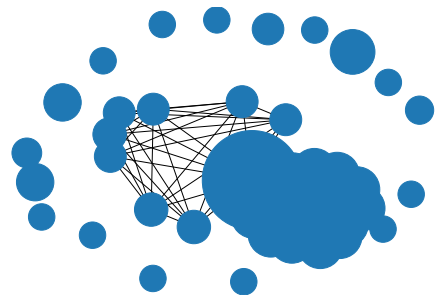

In [21]:
# 그래프 디자인과 관련된 파라미터를 설정합니다.
pos = nx.spring_layout(G, k=0.6, iterations=50)
sizes = [G.nodes[node]['nodesize'] for node in G]
nx.draw(G, pos=pos, node_size=sizes)

In [22]:
font_path="./Fonts/NanumGothic.ttf"
gothic_Font=fm.FontProperties(fname=font_path).get_name()

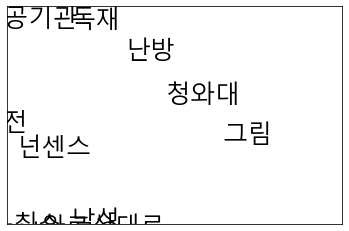

In [28]:
nx.draw_networkx_labels(G, pos=pos, font_family="Malgun Gothic", font_size=25)

# 그래프를 출력합니다.
ax = plt.gca()
plt.savefig('./Results/Relation_Analyzing_Result(Twitter).png')


In [30]:
# 도수가 높은 50개의 단어를 선정합니다.
ranked_datas = node_counts.most_common(50)

# 단어의 최대 글자 크기를 80으로 제한
data_tags = pytagcloud.make_tags(ranked_datas, maxsize=80)

# pytagcloud 이미지를 생성합니다. 폰트는 나눔 고딕을 사용합니다.
pytagcloud.create_tag_image(data_tags, './Results/wordcloud(Twitter).png', size=(600, 600),fontname='NanumGothic', rectangular=False)

AttributeError: Invalid font name. Should be one of Nobile, Old Standard TT, Cantarell, Reenie Beanie, Cuprum, Molengo, Neucha, Philosopher, Yanone Kaffeesatz, Cardo, Neuton, Inconsolata, Crimson Text, Josefin Sans, Droid Sans, Lobster, IM Fell DW Pica, Vollkorn, Tangerine, Coustard, PT Sans Regular